In [1]:
import sys
sys.path.append('eucalc_directory')
import eucalc as ec
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from numpy import genfromtxt
from sklearn.decomposition import PCA

# Path to the folder containing the CSV files
datafolder = "Old_Young_Comparison"

all_files = os.listdir(datafolder)

# Get all CSV filenames in the folder
names = [file for file in all_files if file.lower().endswith(('.tif', '.tiff'))]


# Split names into K8 and K14 groups
names_k8 = [nm for nm in names if 'K8' in nm]
names_k14 = [nm for nm in names if 'K14' in nm]

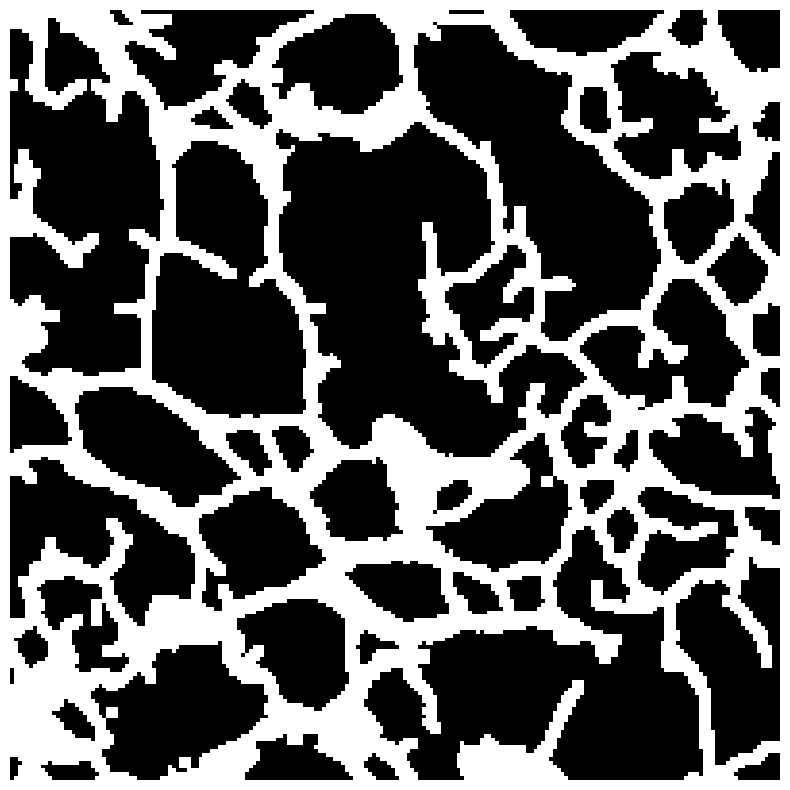

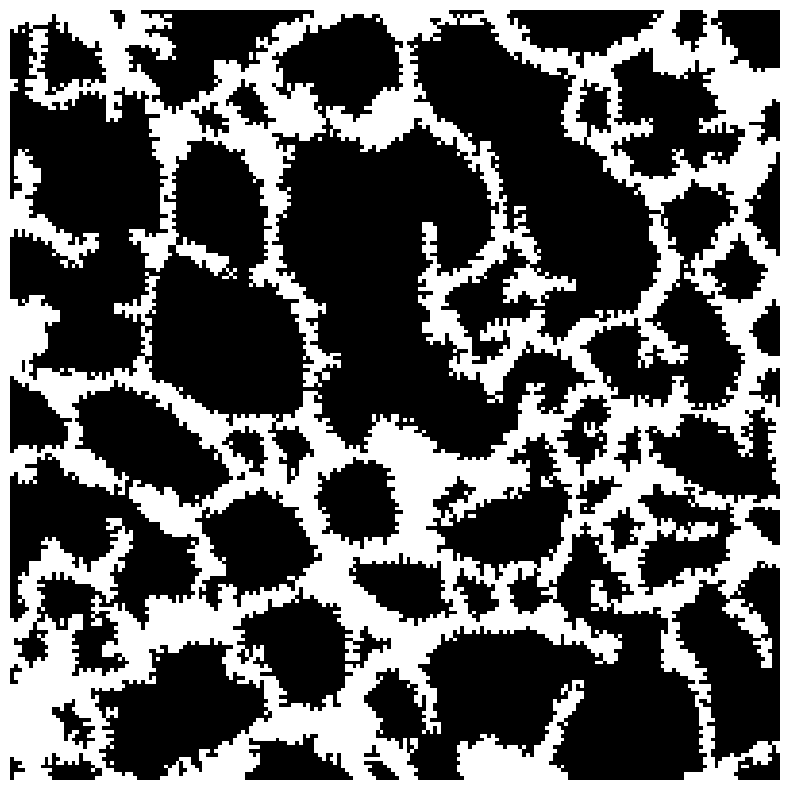

In [18]:
import numpy as np
import random
def colour_flipping(image, percentage, n):
    rows, cols = image.shape
    for i in range(n):
        flippables = []
          # Get the dimensions of the image
        for i in range(1, rows - 1):  # Avoid out-of-bounds errors
            for j in range(1, cols - 1):
                surrounding_entries = np.array([image[i-1,j], image[i+1,j], image[i,j-1], image[i,j+1]])
                if np.sum(surrounding_entries) >=2 and image[i,j] == False:
                    flippables.append((i,j))
        #randomly flip 10% of the flippables
        num_flips = int(len(flippables)*percentage)
        flipped_pixels = random.sample(flippables, num_flips)  # Ensures unique flips
        for flip in flipped_pixels:
            image[flip] = not image[flip]
    for i in range(n):
        flippables = []
          # Get the dimensions of the image
        for i in range(1, rows - 1):  # Avoid out-of-bounds errors
            for j in range(1, cols - 1):
                surrounding_entries = np.array([image[i-1,j], image[i+1,j], image[i,j-1], image[i,j+1]])        
                if np.sum(surrounding_entries) ==3 and image[i,j] == True:
                    flippables.append((i,j))
        flipped_pixels = random.sample(flippables, num_flips)  # Ensures unique flips
        for flip in flipped_pixels:
            image[flip] = not image[flip]
    return image

import matplotlib.pyplot as plt
from PIL import Image
# Path to the image file
image_path = "/Users/hyang/Desktop/andreas/Old_Young_Comparison/O1_K8._2.tif"

# Open the image and convert it to a NumPy array
image = Image.open(image_path)
image_array = np.array(image)


plt.figure(figsize=(10, 10))
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()

flipped_image = colour_flipping(image_array, 0.3, 5)

plt.figure(figsize=(10, 10))
plt.imshow(flipped_image, cmap='gray')
plt.axis('off')
plt.show()

## K8

In [19]:
import os
import tifffile as tiff
import eucalc as ec
import matplotlib.colors as mcolors
from PIL import Image
class EctImg:
    def __init__(self, nm, img, k=20, xinterval=(-1., 1.), xpoints=100, yinterval=(-1., 1.), ypoints=100):
        self.xinterval = xinterval
        self.yinterval = yinterval
        self.xpoints = xpoints
        self.ypoints = ypoints
        self.image = self.compute(img, k, xinterval, xpoints, yinterval, ypoints)
        self.nm = nm
    def compute(self, img, k, xinterval, xpoints, yinterval, ypoints):
        cplx = ec.EmbeddedComplex(img)
        cplx.preproc_ect()
        thetas = np.linspace(0, 2 * np.pi, k + 1)
        ect1 = np.empty((k, xpoints), dtype=float)
        for i in range(k):
            theta = thetas[i]
            direction = np.array((np.sin(theta), np.cos(theta)))
            ect_dir = cplx.compute_euler_characteristic_transform(direction)
            T = np.linspace(xinterval[0], xinterval[1], xpoints)
            ect1[i] = [ect_dir.evaluate(t) for t in T]

        image = np.zeros((ypoints, xpoints), dtype=float)
        yvalues = np.linspace(yinterval[0], yinterval[1], ypoints+1, endpoint=True)
        for i in range(xpoints):
            column = ect1[:, i]
            for j in range(ypoints):
                value = 0
                if j < ypoints-1:
                    value = len(np.where((yvalues[j] <= column) & (column < yvalues[j+1]))[0])/k
                else:
                    value = len(np.where((yvalues[j] <= column) & (column <= yvalues[j+1]))[0])/k
                image[j, i] = value
        return image
    
    def plot(self):
        plt.figure(figsize=(10, 8))
        # Using xinterval and yinterval directly in extent
        plt.imshow(self.image, aspect='auto', extent=[self.xinterval[0], self.xinterval[1], self.yinterval[0], self.yinterval[1]], origin='lower', interpolation='none')
        plt.colorbar(label='Density')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('ECT Image Plot for '+ self.nm)
        plt.show()

# def colour_flipping(image, percentage, n):
#     rows, cols = image.shape
#     for i in range(n):
#         flippables = []
#           # Get the dimensions of the image
#         for i in range(1, rows - 1):  # Avoid out-of-bounds errors
#             for j in range(1, cols - 1):
#                 surrounding_entries = np.array([image[i-1,j], image[i+1,j], image[i,j-1], image[i,j+1]])
#                 if np.sum(surrounding_entries) >=2 and image[i,j] == False:
#                     flippables.append((i,j))
#         #randomly flip 10% of the flippables
#         num_flips = int(len(flippables)*percentage)
#         for i in range(num_flips):
#             flip = random.choice(flippables)
#             image[flip] = True
#     return image

def colour_flipping(image, percentage, n):
    rows, cols = image.shape
    for i in range(n):
        flippables = []
          # Get the dimensions of the image
        for i in range(1, rows - 1):  # Avoid out-of-bounds errors
            for j in range(1, cols - 1):
                surrounding_entries = np.array([image[i-1,j], image[i+1,j], image[i,j-1], image[i,j+1]])
                if np.sum(surrounding_entries) >=2 and image[i,j] == False:
                    flippables.append((i,j))
        #randomly flip 10% of the flippables
        num_flips = int(len(flippables)*percentage)
        flipped_pixels = random.sample(flippables, num_flips)  # Ensures unique flips
        for flip in flipped_pixels:
            image[flip] = not image[flip]
    for i in range(n):
        flippables = []
          # Get the dimensions of the image
        for i in range(1, rows - 1):  # Avoid out-of-bounds errors
            for j in range(1, cols - 1):
                surrounding_entries = np.array([image[i-1,j], image[i+1,j], image[i,j-1], image[i,j+1]])        
                if np.sum(surrounding_entries) ==3 and image[i,j] == True:
                    flippables.append((i,j))
        flipped_pixels = random.sample(flippables, num_flips)  # Ensures unique flips
        for flip in flipped_pixels:
            image[flip] = not image[flip]
    return image

def compute_ExIm(names, data, k=480, xinterval=(-1.5, 1.5), xpoints=300, yinterval=(-450., 50.), ypoints=500):
    ExImage = []
    
    for nm in names: 
        img_array = data[nm]
        
        # Now, compute the ECT image using the new array
        ect = EctImg(nm, img_array, k, xinterval, xpoints, yinterval, ypoints)
        exim = ect.compute(img_array, k, xinterval, xpoints, yinterval, ypoints)
        ExImage.append(exim)

    return ExImage

def compute_ect(names, datafolder, k=200, points=200, interval=(-2., 2.)):
    data = {}
    ect = np.empty((len(names), k, points), dtype=float)  # dtype adjusted to float for ECT values
    thetas = np.linspace(0, 2 * np.pi, k, endpoint=False)
    name_idx = 0
    T = np.linspace(interval[0], interval[1], points)
    for nm in names:
        file_path = os.path.join(datafolder, nm)
        img_array = np.array(Image.open(file_path))
        img_array = colour_flipping(img_array, 0.5, 5)
        data[nm] = img_array
        cplx = ec.EmbeddedComplex(img_array)
        cplx.preproc_ect()
        idx = 0  # Reset idx for each image
        

        for theta in thetas:
            x = np.cos(theta)
            y = np.sin(theta)
            direction = np.array([x, y])
            ect_dir = cplx.compute_euler_characteristic_transform(direction)
            ect_vals = np.array([ect_dir.evaluate(t) for t in T])
            ect[name_idx, idx] = ect_vals
            idx += 1
        
        name_idx += 1
    
    # Finding the maximum value across all entries in ect
    max_value = np.max(ect)
    min_value = np.min(ect)
    return data, max_value, min_value

data_k8,max_value_k8, min_value_k8 = compute_ect(names_k8, datafolder, interval = (-0.6, 0.6))
print(f"Max value: {max_value_k8}, Min value: {min_value_k8}")

def extract_age(name):
    return name[0]

unique_ages = list(set(extract_age(name) for name in names_k8))

# Create a color map based on unique ages
cmap = cm.get_cmap('viridis', len(unique_ages))
age_to_color = {age: cmap(i) for i, age in enumerate(unique_ages)}

exims = compute_ExIm(names_k8, data_k8,k=480, xinterval=(-1.5, 1.5), xpoints=300, yinterval=(min_value_k8-1, max_value_k8+1), ypoints=int(max_value_k8-min_value_k8+2))
flattened_k8 = [image.flatten() for image in exims]



Max value: 110.0, Min value: -8.0


/var/folders/g0/hv3lcsr90h9b96cxhfthkg840000gp/T/ipykernel_21193/3948689391.py:148: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_ages))


In [20]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

def extract_age(name):
    return name[0]

ages_k8 = [extract_age(name) for name in names_k8]
X = np.array(flattened_k8)
y = np.array(ages_k8)
unique_ages = np.unique(y)
ypoints, xpoints = 110, 300  # Set the appropriate image dimensions

# Number of trials for train-test splitting
num_trials = 50
for age in unique_ages:
    print(f"Processing age group: {age}")
    
    # Binary classification: 1 if the sample belongs to the current age, 0 otherwise
    binary_labels = np.where(y == age, 1, 0)
    
    scores = []

    # Parameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 200],       # Number of trees in the forest
        'max_depth': [3, 5, 7, None],         # Tree depth (None means no limit)
        'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 4],        # Minimum samples at a leaf node
        'max_features': ['sqrt', 'log2', None]  # Number of features considered for each split
    }

    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=40),
        param_grid=param_grid,
        scoring='accuracy',
        cv=3,
        n_jobs=-1
    )
    grid_search.fit(X, binary_labels)

    # Best parameters
    best_params = grid_search.best_params_
    print(f"Best parameters for age group {age}: {best_params}")


Processing age group: O
Best parameters for age group O: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Processing age group: Y
Best parameters for age group Y: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [21]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

def extract_age(name):
    return name[0]

ages_k8 = [extract_age(name) for name in names_k8]
X = np.array(flattened_k8)
y = np.array(ages_k8)
unique_ages = np.unique(y)
ypoints, xpoints = 110, 300  # Set the appropriate image dimensions

# Number of trials for train-test splitting
num_trials = 50
for age in unique_ages:
    print(f"Processing age group: {age}")
    
    # Binary classification: 1 if the sample belongs to the current age, 0 otherwise
    binary_labels = np.where(y == age, 1, 0)
    num_true = np.sum(binary_labels)
    print(f"Number of samples in age group {age}: {num_true}")
    # Prepare variables to store SHAP values for averaging
    shap_values_aggregate_1 = None  # To store the sum of SHAP values for class 1 across trials
    shap_values_aggregate_0 = None  # To store the sum of SHAP values for class 0 across trials
    n_1 = 0  # Counter for trials where samples are classified as 1
    n_0 = 0  # Counter for trials where samples are classified as 0
    scores = []
    # Loop for multiple random splits
    for trial in range(num_trials):
        # print(f"Trial {trial + 1}/{num_trials}")

        # Step 2: Randomize train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, binary_labels, test_size=0.2, random_state=40+trial)

        # Step 3: Initialize and train the Random Forest classifier
        rf_classifier = RandomForestClassifier(max_depth = 7,max_features = 'sqrt',min_samples_leaf=1, min_samples_split=2, n_estimators=50,random_state=40)
        rf_classifier.fit(X_train, y_train)
        score = rf_classifier.score(X_test, y_test)
        scores.append(score)
        
    print(f'average accuracy for age {age} is {np.mean(scores)}')

Processing age group: O
Number of samples in age group O: 50
average accuracy for age O is 0.6428571428571429
Processing age group: Y
Number of samples in age group Y: 20
average accuracy for age Y is 0.6585714285714286


## K14

In [22]:
import os
import tifffile as tiff
import eucalc as ec
import matplotlib.colors as mcolors
from PIL import Image
import random
class EctImg:
    def __init__(self, nm, img, k=20, xinterval=(-1., 1.), xpoints=100, yinterval=(-1., 1.), ypoints=100):
        self.xinterval = xinterval
        self.yinterval = yinterval
        self.xpoints = xpoints
        self.ypoints = ypoints
        self.image = self.compute(img, k, xinterval, xpoints, yinterval, ypoints)
        self.nm = nm
    def compute(self, img, k, xinterval, xpoints, yinterval, ypoints):
        cplx = ec.EmbeddedComplex(img)
        cplx.preproc_ect()
        thetas = np.linspace(0, 2 * np.pi, k + 1)
        ect1 = np.empty((k, xpoints), dtype=float)
        for i in range(k):
            theta = thetas[i]
            direction = np.array((np.sin(theta), np.cos(theta)))
            ect_dir = cplx.compute_euler_characteristic_transform(direction)
            T = np.linspace(xinterval[0], xinterval[1], xpoints)
            ect1[i] = [ect_dir.evaluate(t) for t in T]

        image = np.zeros((ypoints, xpoints), dtype=float)
        yvalues = np.linspace(yinterval[0], yinterval[1], ypoints+1, endpoint=True)
        for i in range(xpoints):
            column = ect1[:, i]
            for j in range(ypoints):
                value = 0
                if j < ypoints-1:
                    value = len(np.where((yvalues[j] <= column) & (column < yvalues[j+1]))[0])/k
                else:
                    value = len(np.where((yvalues[j] <= column) & (column <= yvalues[j+1]))[0])/k
                image[j, i] = value
        return image
    
    def plot(self):
        plt.figure(figsize=(10, 8))
        # Using xinterval and yinterval directly in extent
        plt.imshow(self.image, aspect='auto', extent=[self.xinterval[0], self.xinterval[1], self.yinterval[0], self.yinterval[1]], origin='lower', interpolation='none')
        plt.colorbar(label='Density')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.title('ECT Image Plot for '+ self.nm)
        plt.show()

# def colour_flipping(image, percentage, n):
#     rows, cols = image.shape
#     for i in range(n):
#         flippables = []
#           # Get the dimensions of the image
#         for i in range(1, rows - 1):  # Avoid out-of-bounds errors
#             for j in range(1, cols - 1):
#                 surrounding_entries = np.array([image[i-1,j], image[i+1,j], image[i,j-1], image[i,j+1]])
#                 if np.sum(surrounding_entries) >=2 and image[i,j] == False:
#                     flippables.append((i,j))
#         #randomly flip 10% of the flippables
#         num_flips = int(len(flippables)*percentage)
#         for i in range(num_flips):
#             flip = random.choice(flippables)
#             image[flip] = True
#     return image

def colour_flipping(image, percentage, n):
    rows, cols = image.shape
    for i in range(n):
        flippables = []
          # Get the dimensions of the image
        for i in range(1, rows - 1):  # Avoid out-of-bounds errors
            for j in range(1, cols - 1):
                surrounding_entries = np.array([image[i-1,j], image[i+1,j], image[i,j-1], image[i,j+1]])
                if np.sum(surrounding_entries) >=2 and image[i,j] == False:
                    flippables.append((i,j))
        #randomly flip 10% of the flippables
        num_flips = int(len(flippables)*percentage)
        flipped_pixels = random.sample(flippables, num_flips)  # Ensures unique flips
        for flip in flipped_pixels:
            image[flip] = not image[flip]
    for i in range(n):
        flippables = []
          # Get the dimensions of the image
        for i in range(1, rows - 1):  # Avoid out-of-bounds errors
            for j in range(1, cols - 1):
                surrounding_entries = np.array([image[i-1,j], image[i+1,j], image[i,j-1], image[i,j+1]])        
                if np.sum(surrounding_entries) ==3 and image[i,j] == True:
                    flippables.append((i,j))
        flipped_pixels = random.sample(flippables, num_flips)  # Ensures unique flips
        for flip in flipped_pixels:
            image[flip] = not image[flip]
    return image

def compute_ExIm(names, data, k=480, xinterval=(-1.5, 1.5), xpoints=300, yinterval=(-450., 50.), ypoints=500):
    ExImage = []
    
    for nm in names: 
        img_array = data[nm]
        
        # Now, compute the ECT image using the new array
        ect = EctImg(nm, img_array, k, xinterval, xpoints, yinterval, ypoints)
        exim = ect.compute(img_array, k, xinterval, xpoints, yinterval, ypoints)
        ExImage.append(exim)

    return ExImage

def compute_ect(names, datafolder, k=200, points=200, interval=(-2., 2.)):
    data = {}
    ect = np.empty((len(names), k, points), dtype=float)  # dtype adjusted to float for ECT values
    thetas = np.linspace(0, 2 * np.pi, k, endpoint=False)
    name_idx = 0
    T = np.linspace(interval[0], interval[1], points)
    for nm in names:
        file_path = os.path.join(datafolder, nm)
        img_array = np.array(Image.open(file_path))
        img_array = colour_flipping(img_array, 0.5, 5)
        data[nm] = img_array
        cplx = ec.EmbeddedComplex(img_array)
        cplx.preproc_ect()
        idx = 0  # Reset idx for each image
        

        for theta in thetas:
            x = np.cos(theta)
            y = np.sin(theta)
            direction = np.array([x, y])
            ect_dir = cplx.compute_euler_characteristic_transform(direction)
            ect_vals = np.array([ect_dir.evaluate(t) for t in T])
            ect[name_idx, idx] = ect_vals
            idx += 1
        
        name_idx += 1
    
    # Finding the maximum value across all entries in ect
    max_value = np.max(ect)
    min_value = np.min(ect)
    return data, max_value, min_value

data_k14,max_value_k14, min_value_k14 = compute_ect(names_k14, datafolder, interval = (-0.6, 0.6))
print(f"Max value: {max_value_k14}, Min value: {min_value_k14}")

def extract_age(name):
    return name[0]

unique_ages = list(set(extract_age(name) for name in names_k14))

# Create a color map based on unique ages
cmap = cm.get_cmap('viridis', len(unique_ages))
age_to_color = {age: cmap(i) for i, age in enumerate(unique_ages)}

exims = compute_ExIm(names_k14, data_k14,k=480, xinterval=(-1.5, 1.5), xpoints=300, yinterval=(min_value_k14-1, max_value_k14+1), ypoints=int(max_value_k14-min_value_k14+2))
flattened_k14 = [image.flatten() for image in exims]



Max value: 95.0, Min value: -6.0


/var/folders/g0/hv3lcsr90h9b96cxhfthkg840000gp/T/ipykernel_21193/2969841876.py:149: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(unique_ages))


In [23]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

def extract_age(name):
    return name[0]

ages_k14 = [extract_age(name) for name in names_k14]
X = np.array(flattened_k14)
y = np.array(ages_k14)
unique_ages = np.unique(y)
ypoints, xpoints = 110, 300  # Set the appropriate image dimensions

# Number of trials for train-test splitting
num_trials = 50
for age in unique_ages:
    print(f"Processing age group: {age}")
    
    # Binary classification: 1 if the sample belongs to the current age, 0 otherwise
    binary_labels = np.where(y == age, 1, 0)
    
    scores = []

    # Parameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 200],       # Number of trees in the forest
        'max_depth': [3, 5, 7, None],         # Tree depth (None means no limit)
        'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 4],        # Minimum samples at a leaf node
        'max_features': ['sqrt', 'log2', None]  # Number of features considered for each split
    }

    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=40),
        param_grid=param_grid,
        scoring='accuracy',
        cv=3,
        n_jobs=-1
    )
    grid_search.fit(X, binary_labels)

    # Best parameters
    best_params = grid_search.best_params_
    print(f"Best parameters for age group {age}: {best_params}")


Processing age group: O
Best parameters for age group O: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Processing age group: Y
Best parameters for age group Y: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [24]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

def extract_age(name):
    return name[0]

ages_k14 = [extract_age(name) for name in names_k14]
X = np.array(flattened_k14)
y = np.array(ages_k14)
unique_ages = np.unique(y)
ypoints, xpoints = 110, 300  # Set the appropriate image dimensions

# Number of trials for train-test splitting
num_trials = 50
for age in unique_ages:
    print(f"Processing age group: {age}")
    
    # Binary classification: 1 if the sample belongs to the current age, 0 otherwise
    binary_labels = np.where(y == age, 1, 0)
    num_true = np.sum(binary_labels)
    print(f"Number of samples in age group {age}: {num_true}")
    # Prepare variables to store SHAP values for averaging
    shap_values_aggregate_1 = None  # To store the sum of SHAP values for class 1 across trials
    shap_values_aggregate_0 = None  # To store the sum of SHAP values for class 0 across trials
    n_1 = 0  # Counter for trials where samples are classified as 1
    n_0 = 0  # Counter for trials where samples are classified as 0
    scores = []
    # Loop for multiple random splits
    for trial in range(num_trials):
        # print(f"Trial {trial + 1}/{num_trials}")

        # Step 2: Randomize train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, binary_labels, test_size=0.2, random_state=40+trial)

        # Step 3: Initialize and train the Random Forest classifier
        rf_classifier = RandomForestClassifier(max_depth = 5,max_features = 'sqrt',min_samples_leaf=1, min_samples_split=10, n_estimators=200,random_state=40)
        rf_classifier.fit(X_train, y_train)
        score = rf_classifier.score(X_test, y_test)
        scores.append(score)
        
    print(f'average accuracy for age {age} is {np.mean(scores)}')

Processing age group: O
Number of samples in age group O: 50
average accuracy for age O is 0.7014285714285714
Processing age group: Y
Number of samples in age group Y: 20
average accuracy for age Y is 0.7014285714285714
